In [1]:
import os, shutil

In [2]:
original_dataset_dir = '/home/vplentz/Documentos/ml/begginer/deep/book/vision/catsndogs/dataset/train'

In [3]:
base_dir = '/home/vplentz/Documentos/ml/begginer/deep/book/vision/catsndogs'

In [4]:
train_dir = os.path.join(base_dir, 'train')
#os.mkdir(train_dir)

In [5]:
validation_dir = os.path.join(base_dir, 'validation')
#os.mkdir(validation_dir)

In [6]:
train_cats_dir = os.path.join(train_dir, 'cats')
#os.mkdir(train_cats_dir)

In [7]:
train_dogs_dir = os.path.join(train_dir, 'dogs')
#os.mkdir(train_dogs_dir)

In [8]:
validation_cats_dir = os.path.join(validation_dir, 'cats')
#os.mkdir(validation_cats_dir) 
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
#os.mkdir(validation_dogs_dir)

In [9]:
test_dir = os.path.join(base_dir, 'test')
#os.mkdir(test_dir)
test_cats_dir = os.path.join(test_dir, 'cats')
#os.mkdir(test_cats_dir)
test_dogs_dir = os.path.join(test_dir, 'dogs')
#os.mkdir(test_dogs_dir)

cats copy

In [10]:
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)

In [11]:
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)

In [12]:
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)

dog copy

In [13]:
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [14]:
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [15]:
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [10]:
print('total training cat images:', len(os.listdir(train_cats_dir)))

('total training cat images:', 1000)


In [11]:
print('total training dog images:', len(os.listdir(train_dogs_dir)))

('total training dog images:', 1000)


In [12]:
print('total validation cat images:', len(os.listdir(validation_cats_dir)))

('total validation cat images:', 500)


In [13]:
print('total validation dog images:', len(os.listdir(validation_dogs_dir)))

('total validation dog images:', 500)


In [14]:
print('total test cat images:', len(os.listdir(test_cats_dir)))

('total test cat images:', 500)


In [15]:
print('total test dog images:', len(os.listdir(test_dogs_dir)))

('total test dog images:', 500)


data augmentation

In [10]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(rotation_range=40, width_shift_range=0.2, height_shift_range=0.2, shear_range=0.2,
                             zoom_range=0.2, horizontal_flip=True, fill_mode='nearest')

/usr/local/lib/python2.7/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


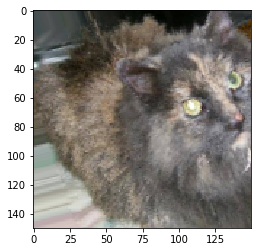

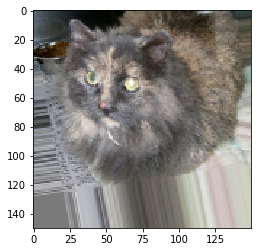

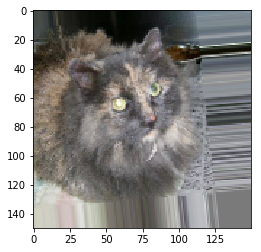

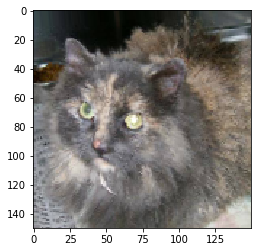

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
from keras.preprocessing import image
fnames = [os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)]
img_path = fnames[3]
img = image.load_img(img_path, target_size=(150, 150))
x = image.img_to_array(img)
x = x.reshape((1,) + x.shape)
i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break
plt.show()

In [12]:
from keras import layers
from keras import models
from keras import optimizers

model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])

In [13]:
train_datagen = ImageDataGenerator( rescale=1./255, rotation_range=40, 
                                   width_shift_range=0.2, height_shift_range=0.2, 
                                   shear_range=0.2, zoom_range=0.2, horizontal_flip=True,)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory( train_dir, target_size=(150, 150),
                                                    batch_size=32, class_mode='binary')
validation_generator = test_datagen.flow_from_directory( validation_dir, target_size=(150, 150), 
                                                        batch_size=32, class_mode='binary')

history = model.fit_generator( train_generator, steps_per_epoch=100, epochs=100,
                              validation_data=validation_generator, validation_steps=50)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/100
100/100 [==============================] - 113s 1s/step - loss: 0.6902 - acc: 0.5234 - val_loss: 0.6768 - val_acc: 0.5850
Epoch 2/100
100/100 [==============================] - 25s 253ms/step - loss: 0.6673 - acc: 0.5928 - val_loss: 0.6726 - val_acc: 0.5476
Epoch 3/100
100/100 [==============================] - 26s 256ms/step - loss: 0.6410 - acc: 0.6247 - val_loss: 0.6302 - val_acc: 0.6326
Epoch 4/100
100/100 [==============================] - 26s 258ms/step - loss: 0.6264 - acc: 0.6425 - val_loss: 0.6763 - val_acc: 0.5939
Epoch 5/100
100/100 [==============================] - 26s 258ms/step - loss: 0.6138 - acc: 0.6556 - val_loss: 0.6020 - val_acc: 0.6618
Epoch 6/100
100/100 [==============================] - 27s 267ms/step - loss: 0.6033 - acc: 0.6725 - val_loss: 0.5980 - val_acc: 0.6688
Epoch 7/100
100/100 [==============================] - 27s 271ms/step - loss: 0.5927 - acc: 0.6772 - v

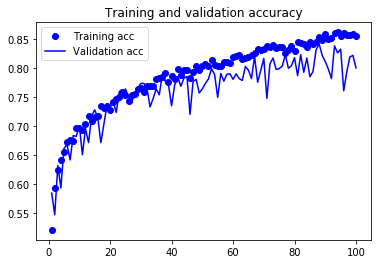

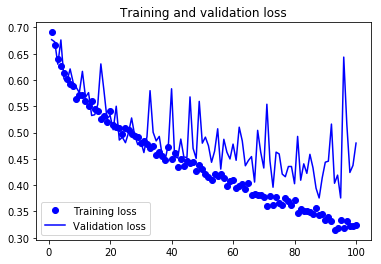

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [18]:
model.save('cats_and_dogs_small_2.h5')